In [1]:
%matplotlib inline


import numpy as np

import xarray as xr

#import regionmask 

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy.ma as ma
import csv
#import netCDF4 as nc
import scipy
import pandas
from glob import glob
import pandas as pd

np.seterr(invalid='ignore'); # disable a warning from matplotlib and cartopy

In [14]:
from gamap_colormap import WhGrYlRd  # import the "WhGrYlRd" variable from my custom Python script
type(WhGrYlRd)  # our custom colormap

matplotlib.colors.ListedColormap

In [2]:
# WILL USE THESE UNITS FOR CONVERSIONS LATER, INITIALIZE HERE
R=8.317 #J/(mol K)
MW=200.59 #molecular weight of hg in g/mol
ppt=1e-12 #current [Hg0] units is ex. .03 ppt, where ppt is 1e-12
stdpressure=101325 #pascals
stdtemp=273.15 #Kelvins

In [3]:
def fix_ds(ds):
    return ds.assign_coords({'LON':ds.LON, 'LAT':ds.LAT, 'ETAC':ds.ETAC, 'ETAE':ds.ETAE, 
                            'time':pd.to_datetime(ds.attrs['Start_Date'], format='%Y%m%d')}
                           ).expand_dims('time')

#open base files (with artisnal mining)
ds_base=xr.open_mfdataset('/net/fs03/d1/angot/postdoc/GMA_2018/my_runs/production_runs_2x2.5/BASE/netcdf_output/trac.2015*.nc',
                         preprocess=fix_ds, concat_dim=['time'], combine='by_coords')


# Emissions Inventories

In [51]:
! ls /net/fs03/d1/angot/postdoc/GMA_2018/emissions_inventory

GMA_emissions_ASGM_Hg0.0.25x0.25.2015.nc
GMA_emissions_ASGM_Hg2.0.25x0.25.2015.nc
GMA_emissions_ASGM_HgP.0.25x0.25.2015.nc
GMA_emissions_INDS_Hg0.0.25x0.25.2015.nc
GMA_emissions_INDS_Hg2.0.25x0.25.2015.nc
GMA_emissions_INDS_HgP.0.25x0.25.2015.nc
GMA_emissions_INTW_Hg0.0.25x0.25.2015.nc
GMA_emissions_INTW_Hg2.0.25x0.25.2015.nc
GMA_emissions_INTW_HgP.0.25x0.25.2015.nc
GMA_emissions_POWERGEN_Hg0.0.25x0.25.2015.nc
GMA_emissions_POWERGEN_Hg2.0.25x0.25.2015.nc
GMA_emissions_POWERGEN_HgP.0.25x0.25.2015.nc


In [52]:
#open asgm emissions inventory file
ds_asgm=xr.open_mfdataset('/net/fs03/d1/angot/postdoc/GMA_2018/emissions_inventory/GMA_emissions_ASGM_Hg0.0.25x0.25.2015.nc')
#ds_asgm
#open industry emissions inventory file
ds_inds=xr.open_mfdataset('/net/fs03/d1/angot/postdoc/GMA_2018/emissions_inventory/GMA_emissions_INDS_Hg0.0.25x0.25.2015.nc')
#open INTW emissions inventory file
ds_intw=xr.open_mfdataset('/net/fs03/d1/angot/postdoc/GMA_2018/emissions_inventory/GMA_emissions_INTW_Hg0.0.25x0.25.2015.nc')
#open INTW emissions inventory file
ds_pgen=xr.open_mfdataset('/net/fs03/d1/angot/postdoc/GMA_2018/emissions_inventory/GMA_emissions_POWERGEN_Hg0.0.25x0.25.2015.nc')




In [58]:
ds_inds

<xarray.Dataset>
Dimensions:   (lat: 720, lon: 1440)
Coordinates:
  * lon       (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * lat       (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
Data variables:
    emi_hg_0  (lat, lon) float32 dask.array<chunksize=(720, 1440), meta=np.ndarray>

In [53]:
ds_pgen

<xarray.Dataset>
Dimensions:   (lat: 720, lon: 1440)
Coordinates:
  * lon       (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * lat       (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
Data variables:
    emi_hg_0  (lat, lon) float32 dask.array<chunksize=(720, 1440), meta=np.ndarray>

In [57]:
ds_intw

<xarray.Dataset>
Dimensions:   (lat: 720, lon: 1440)
Coordinates:
  * lon       (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * lat       (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
Data variables:
    emi_hg_0  (lat, lon) float32 dask.array<chunksize=(720, 1440), meta=np.ndarray>

In [59]:
#create combined dataset 
ds_emitant=xr.Dataset()
ds_emitant['emi_hg_0_asgm']=(ds_asgm['emi_hg_0'])
ds_emitant['emi_hg_0_inds']=(ds_inds['emi_hg_0'])
ds_emitant['emi_hg_0_pgen']=(ds_pgen['emi_hg_0'])
ds_emitant['emi_hg_0_intw']=(ds_intw['emi_hg_0'])

In [60]:
ds_emitant

<xarray.Dataset>
Dimensions:        (lat: 720, lon: 1440)
Coordinates:
  * lon            (lon) float64 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * lat            (lat) float64 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
Data variables:
    emi_hg_0_asgm  (lat, lon) float32 dask.array<chunksize=(720, 1440), meta=np.ndarray>
    emi_hg_0_inds  (lat, lon) float32 dask.array<chunksize=(720, 1440), meta=np.ndarray>
    emi_hg_0_pgen  (lat, lon) float32 dask.array<chunksize=(720, 1440), meta=np.ndarray>
    emi_hg_0_intw  (lat, lon) float32 dask.array<chunksize=(720, 1440), meta=np.ndarray>

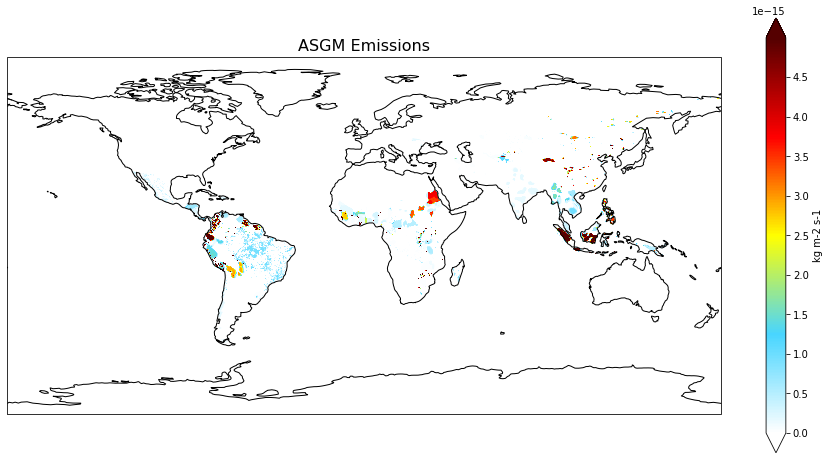

In [56]:

#ds_srce['HG-SRCE__Hg0_an'].mean(dim='time').plot()
fig = plt.figure(figsize=[16,8])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

ds_asgm['emi_hg_0'].plot(ax=ax, #set the axis
                        levels = np.arange(0,5e-15,0.5e-18), #set the levels for our colorbars
                       extend='both',#extend the colorbar in both directions
                       transform=ccrs.PlateCarree(), #fit data into map
                       cbar_kwargs={'label':ds_asgm['emi_hg_0'].attrs['units']}, #label our colorbar (use ds_a just to get units)
                        cmap=WhGrYlRd)  #choose color for our colorbar

ax.coastlines() #add coastlines
plt.title('ASGM Emissions', fontsize = 16); #title
#av=df_d.resample('AS').mean()
#print('Global Average Value from Model: ',av['IJ-AVG-S_Hg0'][0])

In [45]:
Latam_asgm=ds_asgm.loc[dict(lon=slice(268.0,335.0),lat=slice(-58,18))]
Latam_asgm

<xarray.Dataset>
Dimensions:   (lat: 304, lon: 268)
Coordinates:
  * lon       (lon) float64 268.1 268.4 268.6 268.9 ... 334.1 334.4 334.6 334.9
  * lat       (lat) float64 -57.88 -57.62 -57.38 -57.12 ... 17.38 17.62 17.88
Data variables:
    emi_hg_0  (lat, lon) float32 dask.array<chunksize=(304, 268), meta=np.ndarray>

In [44]:
def LonTo360(dlon):
    # Convert longitudes to 0-360 deg
    dlon = ((360 + (dlon % 360)) % 360)
    return dlon
LonTo360(-25.0)

335.0

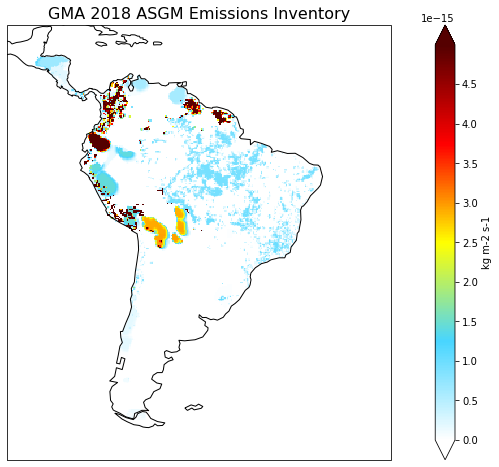

In [65]:

#ds_srce['HG-SRCE__Hg0_an'].mean(dim='time').plot()
fig = plt.figure(figsize=[16,8])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

Latam_asgm['emi_hg_0'].plot(ax=ax, #set the axis
                        levels = np.arange(0,5e-15,0.5e-18), #set the levels for our colorbars
                       extend='both',#extend the colorbar in both directions
                       transform=ccrs.PlateCarree(), #fit data into map
                       cbar_kwargs={'label':ds_asgm['emi_hg_0'].attrs['units']}, #label our colorbar (use ds_a just to get units)
                        cmap=WhGrYlRd)  #choose color for our colorbar

ax.coastlines() #add coastlines
plt.title('GMA 2018 ASGM Emissions Inventory', fontsize = 16); #title
#av=df_d.resample('AS').mean()
#print('Global Average Value from Model: ',av['IJ-AVG-S_Hg0'][0])

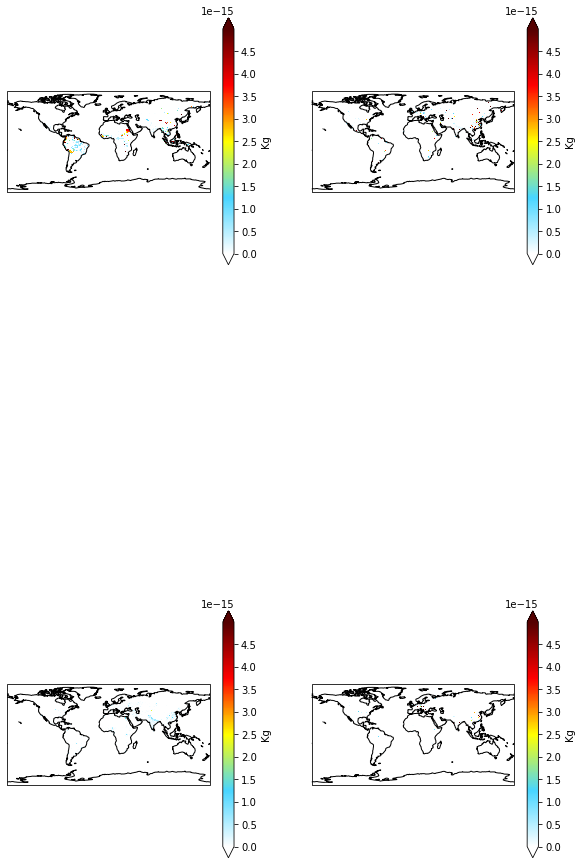

In [64]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

emissions=['emi_hg_0_asgm', 'emi_hg_0_inds', 'emi_hg_0_intw','emi_hg_0_pgen']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 20),subplot_kw={'projection': ccrs.PlateCarree()})
norm = mpl.colors.Normalize(vmin=0, vmax=5)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=WhGrYlRd).cmap
i=0
for ax in axes.flat:
    #ax.set_axis_off()
    im = ds_emitant[emissions[i]].plot(ax=ax, #set the axis
                        levels = np.arange(0,5e-15,0.5e-18), #set the levels for our colorbars
                       extend='both',#extend the colorbar in both directions
                       transform=ccrs.PlateCarree(), #fit data into map
                       vmin=0, cbar_kwargs={'shrink': 0.5, 'label': 'Kg'},
                        #cbar_kwargs={'label':'Kg'}, #label our colorbar (use ds_a just to get units)
                        cmap=cmap)  #choose color for our colorbar

    ax.coastlines() #add coastlines
    #ax.set_title(Cat_m[emissions[i]][0])
    i=i+1
    #plt.title('Annual Averaged Total Emissions', fontsize = 16); #title
    

# notice that here we use ax param of figure.colorbar method instead of

# the cax param as the above example

#cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.95)

#cbar.set_ticks(np.arange(0, 1.1, 0.5))
#cbar.set_ticklabels(['low', 'medium', 'high'])

plt.show()

In [4]:
df_asgm=ds_asgm.to_dataframe()

In [26]:
df_asgm['emi_hg_0'].sum()

3.5788292e-11

In [20]:
np.arange(0,3.8650967192424557e-13,0.5e-14)

array([0.00e+00, 5.00e-15, 1.00e-14, 1.50e-14, 2.00e-14, 2.50e-14,
       3.00e-14, 3.50e-14, 4.00e-14, 4.50e-14, 5.00e-14, 5.50e-14,
       6.00e-14, 6.50e-14, 7.00e-14, 7.50e-14, 8.00e-14, 8.50e-14,
       9.00e-14, 9.50e-14, 1.00e-13, 1.05e-13, 1.10e-13, 1.15e-13,
       1.20e-13, 1.25e-13, 1.30e-13, 1.35e-13, 1.40e-13, 1.45e-13,
       1.50e-13, 1.55e-13, 1.60e-13, 1.65e-13, 1.70e-13, 1.75e-13,
       1.80e-13, 1.85e-13, 1.90e-13, 1.95e-13, 2.00e-13, 2.05e-13,
       2.10e-13, 2.15e-13, 2.20e-13, 2.25e-13, 2.30e-13, 2.35e-13,
       2.40e-13, 2.45e-13, 2.50e-13, 2.55e-13, 2.60e-13, 2.65e-13,
       2.70e-13, 2.75e-13, 2.80e-13, 2.85e-13, 2.90e-13, 2.95e-13,
       3.00e-13, 3.05e-13, 3.10e-13, 3.15e-13, 3.20e-13, 3.25e-13,
       3.30e-13, 3.35e-13, 3.40e-13, 3.45e-13, 3.50e-13, 3.55e-13,
       3.60e-13, 3.65e-13, 3.70e-13, 3.75e-13, 3.80e-13, 3.85e-13])

In [16]:
import geopandas as gpd
gdf_asgm = gpd.GeoDataFrame(df_asgm, geometry = gpd.points_from_xy(df_asgm['lon'],df_asgm['lat'] ))
#LAPAN_gdf.plot(markersize = 1.5, figsize = (10,10))
gdf_asgm

KeyError: 'lon'

In [108]:
for item in ds_base.keys():
    
    dic=ds_base[item].attrs
    res = [item] 
    for key in dic.keys() : 
        res.append(dic[key]) 
    print(res)
    #Cat_m.append(res)


['Ap', 'Hybrid-grid A parameter', 'hPa']
['Bp', 'Hybrid-grid B parameter', 'unitless']
['IJ-AVG-S__Hg0', 'Hg0 tracer', 'pptv']
['IJ-AVG-S__Hg2', 'Hg2 tracer', 'pptv']
['IJ-AVG-S__HgP', 'HgP tracer', 'pptv']
['EW-FLX-S__Hg0', 'Hg0 tracer', 'kg/s']
['EW-FLX-S__Hg2', 'Hg2 tracer', 'kg/s']
['EW-FLX-S__HgP', 'HgP tracer', 'kg/s']
['NS-FLX-S__Hg0', 'Hg0 tracer', 'kg/s']
['NS-FLX-S__Hg2', 'Hg2 tracer', 'kg/s']
['NS-FLX-S__HgP', 'HgP tracer', 'kg/s']
['UP-FLX-S__Hg0', 'Hg0 tracer', 'kg/s']
['UP-FLX-S__Hg2', 'Hg2 tracer', 'kg/s']
['UP-FLX-S__HgP', 'HgP tracer', 'kg/s']
['WETDCV-S__Hg2', 'Hg2 tracer', 'kg/s']
['WETDCV-S__HgP', 'HgP tracer', 'kg/s']
['WETDLS-S__Hg2', 'Hg2 tracer', 'kg/s']
['WETDLS-S__HgP', 'HgP tracer', 'kg/s']
['MC-FRC-S__Hg2', 'Hg2 tracer', 'unitless']
['MC-FRC-S__HgP', 'HgP tracer', 'unitless']
['PEDGE-S__PSURF', 'Surface pressure', 'mb']
['DAO-FLDS__PREACC', 'GMAO PREACC field', 'mm/day']
['DAO-FLDS__PRECON', 'GMAO PRECON field', 'mm/day']
['DAO-3D-S__TMPU', 'GMAO TMPU field'

In [20]:
Cat_m=[]
for item in ds_base.keys():
    if str(item)[:1]=='H':
        dic=ds_base[item].attrs
        res = [item] 
        for key in dic.keys() : 
            res.append(dic[key]) 
        print(res)
        Cat_m.append(res)


['HG-SRCE__Hg0_an', 'Anthro elemental Hg', 'kg']
['HG-SRCE__Hg0_aq', 'Ocean mass of elemental Hg', 'kg']
['HG-SRCE__Hg0_oc', 'Ocean-emitted elemental Hg', 'kg']
['HG-SRCE__Hg0_ln', 'Land re-emitted elemental Hg', 'kg']
['HG-SRCE__Hg0_na', 'Natural land source', 'kg']
['HG-SRCE__Hg2_an', 'Anthro divalent Hg', 'kg']
['HG-SRCE__Hg2_aq', 'Ocean mass of divalent Hg', 'kg']
['HG-SRCE__Hg2_sk', 'Mass of Hg2 sunk in ocean', 'kg']
['HG-SRCE__HgP_an', 'Anthro particulate Hg', 'kg']
['HG-SRCE__Hgaq_tot', 'Total oceanic mercury', 'kg']
['HG-SRCE__HgP_aq', 'Ocean mass of particulate Hg', 'kg']
['HG-SRCE__JorgC', 'Mass of orgC sunk in ocean', 'kg']
['HG-SRCE__Hg_bb', 'Hg biomass burn emis', 'kg']
['HG-SRCE__Hg_vg', 'Hg vegetation emissions', 'kg']
['HG-SRCE__Hg_so', 'Hg soil emissions', 'kg']
['HG-SRCE__Hg_up', 'Hg ocean up flux', 'kg']
['HG-SRCE__Hg_down', 'Hg ocean downflux', 'kg']
['HG-SRCE__Hg0_snow', 'Snow emission of Hg', 'kg']
['HG-SRCE__Hg_sn_oc', 'Snow Hg2 delivered to ocean', 'kg']
['HG-SR

6

In [69]:
emissions=['HG-SRCE__Hg0_an','HG-SRCE__Hg0_oc','HG-SRCE__Hg0_ln','HG-SRCE__Hg0_na','HG-SRCE__Hgaq_tot','HG-SRCE__Hg_bb','HG-SRCE__Hg_so','HG-SRCE__Hg_up','HG-SRCE__Hg_down','HG-SRCE__Hg0_snow'] 

In [70]:
Emit_Cat=[]
for item in ds_base.keys():
    if str(item)[:1]=='H':
        if item in emissions:
            Emit_Cat.append(item)
            print(item)
len(Emit_Cat)

HG-SRCE__Hg0_an
HG-SRCE__Hg0_oc
HG-SRCE__Hg0_ln
HG-SRCE__Hg0_na
HG-SRCE__Hgaq_tot
HG-SRCE__Hg_bb
HG-SRCE__Hg_so
HG-SRCE__Hg_up
HG-SRCE__Hg_down
HG-SRCE__Hg0_snow


10

In [71]:
ds_Em =xr.Dataset()
for item in Emit_Cat:
    ds_Em[item] =(ds_base[item])

ds_Em

<xarray.Dataset>
Dimensions:            (Alt-000: 1, Lat-000: 91, Lon-000: 144, time: 12)
Coordinates:
    LON                (Lon-000) float32 dask.array<chunksize=(144,), meta=np.ndarray>
    LAT                (Lat-000) float32 dask.array<chunksize=(91,), meta=np.ndarray>
  * time               (time) datetime64[ns] 2015-01-01 ... 2015-12-01
Dimensions without coordinates: Alt-000, Lat-000, Lon-000
Data variables:
    HG-SRCE__Hg0_an    (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    HG-SRCE__Hg0_oc    (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    HG-SRCE__Hg0_ln    (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    HG-SRCE__Hg0_na    (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    HG-SRCE__Hgaq_tot  (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    HG-SRCE__Hg_bb     (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    HG-SRCE__Hg_so     (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    HG-SRCE__Hg_up     (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    HG-SRCE__Hg_down   (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    HG-SRCE__Hg0_snow  (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>

In [72]:
Cat_m=[]
for item in ds_Em.keys():
    if str(item)[:1]=='H':
        dic=ds_Em[item].attrs
        res = [item] 
        for key in dic.keys() : 
            res.append(dic[key]) 
        print(res)
        Cat_m.append(res)


['HG-SRCE__Hg0_an', 'Anthro elemental Hg', 'kg']
['HG-SRCE__Hg0_oc', 'Ocean-emitted elemental Hg', 'kg']
['HG-SRCE__Hg0_ln', 'Land re-emitted elemental Hg', 'kg']
['HG-SRCE__Hg0_na', 'Natural land source', 'kg']
['HG-SRCE__Hgaq_tot', 'Total oceanic mercury', 'kg']
['HG-SRCE__Hg_bb', 'Hg biomass burn emis', 'kg']
['HG-SRCE__Hg_so', 'Hg soil emissions', 'kg']
['HG-SRCE__Hg_up', 'Hg ocean up flux', 'kg']
['HG-SRCE__Hg_down', 'Hg ocean downflux', 'kg']
['HG-SRCE__Hg0_snow', 'Snow emission of Hg', 'kg']


In [73]:
Cat_m={}
for item in ds_Em.keys():
    if str(item)[:1]=='H':
        dic=ds_Em[item].attrs
        res = [] 
        for key in dic.keys() : 
            res.append(dic[key]) 
        print(res)
        Cat_m[item]=res


['Anthro elemental Hg', 'kg']
['Ocean-emitted elemental Hg', 'kg']
['Land re-emitted elemental Hg', 'kg']
['Natural land source', 'kg']
['Total oceanic mercury', 'kg']
['Hg biomass burn emis', 'kg']
['Hg soil emissions', 'kg']
['Hg ocean up flux', 'kg']
['Hg ocean downflux', 'kg']
['Snow emission of Hg', 'kg']


In [74]:
#dr=ds_Em.rename({'Lon-000': 'longitude','Lat-000': 'latitude'})
#drSA=dr.loc[dict(longitude=slice(-92.0,-25.0),latitude=slice(-58.0,18.0))]
#dr
#ds_Em[emissions[3]] =' Natural land source'
#ds_Em[emissions[2]] = 'Land re-emitted elemental Hg'


In [75]:
for item in emissions:
    print(item+' = '+Cat_m[item][0])

HG-SRCE__Hg0_an = Anthro elemental Hg
HG-SRCE__Hg0_oc = Ocean-emitted elemental Hg
HG-SRCE__Hg0_ln = Land re-emitted elemental Hg
HG-SRCE__Hg0_na = Natural land source
HG-SRCE__Hgaq_tot = Total oceanic mercury
HG-SRCE__Hg_bb = Hg biomass burn emis
HG-SRCE__Hg_so = Hg soil emissions
HG-SRCE__Hg_up = Hg ocean up flux
HG-SRCE__Hg_down = Hg ocean downflux
HG-SRCE__Hg0_snow = Snow emission of Hg


In [76]:
df_emit = ds_Em.to_dataframe()
df_Esurf=df_emit[:157248]

# #######changing units to ng/m3 from ppt using P/(TR)*pptv*MW #########
del df_Esurf['LON']
del df_Esurf['LAT']
'''P/(TR)*ppt*MW --> Pa/(K*J/(mol*K))*ppt*g/mol --> g/m3*ppt. to get rid of ppt, multiply by 1e-12.'''
#species=['HG-SRCE__Hgdep_sn', 'HG-SRCE__Hgdep_oc', 'HG-SRCE__Hg_sn_oc',
#        'HG-SRCE__Hg0_snow','HG-SRCE__Hg_down','HG-SRCE__Hg_up','HG-SRCE__Hg0_an',
 #       'HG-SRCE__Hg0_aq','HG-SRCE__Hg0_oc','HG-SRCE__Hg0_ln','HG-SRCE__Hg0_na','HG-SRCE__Hg_vg',
#        'HG-SRCE__Hg_bb']
for s in Emit_Cat:
    df_Esurf[s]= df_Esurf[s]#1e12 converts from kg to ng

#now units are ng/m3
#ds_b['IJ-AVG-S_Hg0'].attrs['unit']='ng/m3'
df_Esurf

<ipython-input-76-d1ba7bdcb47a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Esurf[s]= df_Esurf[s]#1e12 converts from kg to ng


HG-SRCE__Hg0_an  HG-SRCE__Hg0_oc  \
Alt-000 Lat-000 Lon-000 time                                           
0       0       0       2015-01-01              0.0              0.0   
                        2015-02-01              0.0              0.0   
                        2015-03-01              0.0              0.0   
                        2015-04-01              0.0              0.0   
                        2015-05-01              0.0              0.0   
...                                             ...              ...   
        90      143     2015-08-01              0.0              0.0   
                        2015-09-01              0.0              0.0   
                        2015-10-01              0.0              0.0   
                        2015-11-01              0.0              0.0   
                        2015-12-01              0.0              0.0   

                                    HG-SRCE__Hg0_ln  HG-SRCE__Hg0_na  \
Alt-000 Lat-000 Lon-000 time                                           
0       0       0       2015-01-01              0.0              0.0   
                        2015-02-01              0.0              0.0   
                        2015-03-01              0.0              0.0   
                        2015-04-01              0.0              0.0   
                        2015-05-01              0.0              0.0   
...                                             ...              ...   
        90      143     2015-08-01              0.0              0.0   
                        2015-09-01              0.0              0.0   
                        2015-10-01              0.0              0.0   
                        2015-11-01              0.0              0.0   
                        2015-12-01              0.0              0.0   

                                    HG-SRCE__Hgaq_tot  HG-SRCE__Hg_bb  \
Alt-000 Lat-000 Lon-000 time                                            
0       0       0       2015-01-01                0.0             0.0   
                        2015-02-01                0.0             0.0   
                        2015-03-01                0.0             0.0   
                        2015-04-01                0.0             0.0   
                        2015-05-01                0.0             0.0   
...                                               ...             ...   
        90      143     2015-08-01                0.0             0.0   
                        2015-09-01                0.0             0.0   
                        2015-10-01                0.0             0.0   
                        2015-11-01                0.0             0.0   
                        2015-12-01                0.0             0.0   

                                    HG-SRCE__Hg_so  HG-SRCE__Hg_up  \
Alt-000 Lat-000 Lon-000 time                                         
0       0       0       2015-01-01             0.0             0.0   
                        2015-02-01             0.0             0.0   
                        2015-03-01             0.0             0.0   
                        2015-04-01             0.0             0.0   
                        2015-05-01             0.0             0.0   
...                                            ...             ...   
        90      143     2015-08-01             0.0             0.0   
                        2015-09-01             0.0             0.0   
                        2015-10-01             0.0             0.0   
                        2015-11-01             0.0             0.0   
                        2015-12-01             0.0             0.0   

                                    HG-SRCE__Hg_down  HG-SRCE__Hg0_snow  
Alt-000 Lat-000 Lon-000 time                                             
0       0       0       2015-01-01               0.0           0.045372  
                        2015-02-01               0.0           0.043245  
     

In [77]:
df_Esurf['Tot_emit'] = df_Esurf.sum(axis=1)
df_Esurf['Tot_emit']

<ipython-input-77-02691b14c35c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Esurf['Tot_emit'] = df_Esurf.sum(axis=1)


Alt-000  Lat-000  Lon-000  time      
0        0        0        2015-01-01    0.045372
                           2015-02-01    0.043245
                           2015-03-01    0.031274
                           2015-04-01    0.000000
                           2015-05-01    0.000000
                                           ...   
         90       143      2015-08-01    0.022297
                           2015-09-01    0.005172
                           2015-10-01    0.000000
                           2015-11-01    0.000000
                           2015-12-01    0.000000
Name: Tot_emit, Length: 157248, dtype: float32

In [78]:
dx_Emit=df_Esurf.to_xarray()
dx_Emit

<xarray.Dataset>
Dimensions:            (Alt-000: 1, Lat-000: 91, Lon-000: 144, time: 12)
Coordinates:
  * Alt-000            (Alt-000) int64 0
  * Lat-000            (Lat-000) int64 0 1 2 3 4 5 6 7 ... 84 85 86 87 88 89 90
  * Lon-000            (Lon-000) int64 0 1 2 3 4 5 6 ... 138 139 140 141 142 143
  * time               (time) datetime64[ns] 2015-01-01 ... 2015-12-01
Data variables:
    HG-SRCE__Hg0_an    (Alt-000, Lat-000, Lon-000, time) float32 0.0 0.0 ... 0.0
    HG-SRCE__Hg0_oc    (Alt-000, Lat-000, Lon-000, time) float32 0.0 0.0 ... 0.0
    HG-SRCE__Hg0_ln    (Alt-000, Lat-000, Lon-000, time) float32 0.0 0.0 ... 0.0
    HG-SRCE__Hg0_na    (Alt-000, Lat-000, Lon-000, time) float32 0.0 0.0 ... 0.0
    HG-SRCE__Hgaq_tot  (Alt-000, Lat-000, Lon-000, time) float32 0.0 0.0 ... 0.0
    HG-SRCE__Hg_bb     (Alt-000, Lat-000, Lon-000, time) float32 0.0 0.0 ... 0.0
    HG-SRCE__Hg_so     (Alt-000, Lat-000, Lon-000, time) float32 0.0 0.0 ... 0.0
    HG-SRCE__Hg_up     (Alt-000, Lat-000, Lon-000, time) float32 0.0 0.0 ... 0.0
    HG-SRCE__Hg_down   (Alt-000, Lat-000, Lon-000, time) float32 0.0 0.0 ... 0.0
    HG-SRCE__Hg0_snow  (Alt-000, Lat-000, Lon-000, time) float32 0.04537 ... 0.0
    Tot_emit           (Alt-000, Lat-000, Lon-000, time) float32 0.04537 ... 0.0

In [79]:
#dr_tot=df_Esurf['Tot_emit'].to_xarray()
#dr_tot

In [80]:
#coordinates got messed up so fix it

drop=dx_Emit.drop('Lon-000')
new=dx_Emit.drop('Lat-000')
dr_fixed=new.assign_coords({'Lon-000':np.arange(-180., 180., 2.5), 'Lat-000':np.arange(-90., 90., 1.98)})
dr_fixed

<xarray.Dataset>
Dimensions:            (Alt-000: 1, Lat-000: 91, Lon-000: 144, time: 12)
Coordinates:
  * Alt-000            (Alt-000) int64 0
  * Lon-000            (Lon-000) float64 -180.0 -177.5 -175.0 ... 175.0 177.5
  * time               (time) datetime64[ns] 2015-01-01 ... 2015-12-01
  * Lat-000            (Lat-000) float64 -90.0 -88.02 -86.04 ... 86.22 88.2
Data variables:
    HG-SRCE__Hg0_an    (Alt-000, Lat-000, Lon-000, time) float32 0.0 0.0 ... 0.0
    HG-SRCE__Hg0_oc    (Alt-000, Lat-000, Lon-000, time) float32 0.0 0.0 ... 0.0
    HG-SRCE__Hg0_ln    (Alt-000, Lat-000, Lon-000, time) float32 0.0 0.0 ... 0.0
    HG-SRCE__Hg0_na    (Alt-000, Lat-000, Lon-000, time) float32 0.0 0.0 ... 0.0
    HG-SRCE__Hgaq_tot  (Alt-000, Lat-000, Lon-000, time) float32 0.0 0.0 ... 0.0
    HG-SRCE__Hg_bb     (Alt-000, Lat-000, Lon-000, time) float32 0.0 0.0 ... 0.0
    HG-SRCE__Hg_so     (Alt-000, Lat-000, Lon-000, time) float32 0.0 0.0 ... 0.0
    HG-SRCE__Hg_up     (Alt-000, Lat-000, Lon-000, time) float32 0.0 0.0 ... 0.0
    HG-SRCE__Hg_down   (Alt-000, Lat-000, Lon-000, time) float32 0.0 0.0 ... 0.0
    HG-SRCE__Hg0_snow  (Alt-000, Lat-000, Lon-000, time) float32 0.04537 ... 0.0
    Tot_emit           (Alt-000, Lat-000, Lon-000, time) float32 0.04537 ... 0.0

In [81]:
dr=dr_fixed.rename({'Lon-000': 'longitude','Lat-000': 'latitude'})
drSA=dr.loc[dict(longitude=slice(-92.0,-25.0),latitude=slice(-58.0,18.0))]
dr

<xarray.Dataset>
Dimensions:            (Alt-000: 1, latitude: 91, longitude: 144, time: 12)
Coordinates:
  * Alt-000            (Alt-000) int64 0
  * longitude          (longitude) float64 -180.0 -177.5 -175.0 ... 175.0 177.5
  * time               (time) datetime64[ns] 2015-01-01 ... 2015-12-01
  * latitude           (latitude) float64 -90.0 -88.02 -86.04 ... 86.22 88.2
Data variables:
    HG-SRCE__Hg0_an    (Alt-000, latitude, longitude, time) float32 0.0 ... 0.0
    HG-SRCE__Hg0_oc    (Alt-000, latitude, longitude, time) float32 0.0 ... 0.0
    HG-SRCE__Hg0_ln    (Alt-000, latitude, longitude, time) float32 0.0 ... 0.0
    HG-SRCE__Hg0_na    (Alt-000, latitude, longitude, time) float32 0.0 ... 0.0
    HG-SRCE__Hgaq_tot  (Alt-000, latitude, longitude, time) float32 0.0 ... 0.0
    HG-SRCE__Hg_bb     (Alt-000, latitude, longitude, time) float32 0.0 ... 0.0
    HG-SRCE__Hg_so     (Alt-000, latitude, longitude, time) float32 0.0 ... 0.0
    HG-SRCE__Hg_up     (Alt-000, latitude, longitude, time) float32 0.0 ... 0.0
    HG-SRCE__Hg_down   (Alt-000, latitude, longitude, time) float32 0.0 ... 0.0
    HG-SRCE__Hg0_snow  (Alt-000, latitude, longitude, time) float32 0.04537 ....
    Tot_emit           (Alt-000, latitude, longitude, time) float32 0.04537 ....

In [82]:
Cat_m

{'HG-SRCE__Hg0_an': ['Anthro elemental Hg', 'kg'],
 'HG-SRCE__Hg0_oc': ['Ocean-emitted elemental Hg', 'kg'],
 'HG-SRCE__Hg0_ln': ['Land re-emitted elemental Hg', 'kg'],
 'HG-SRCE__Hg0_na': ['Natural land source', 'kg'],
 'HG-SRCE__Hgaq_tot': ['Total oceanic mercury', 'kg'],
 'HG-SRCE__Hg_bb': ['Hg biomass burn emis', 'kg'],
 'HG-SRCE__Hg_so': ['Hg soil emissions', 'kg'],
 'HG-SRCE__Hg_up': ['Hg ocean up flux', 'kg'],
 'HG-SRCE__Hg_down': ['Hg ocean downflux', 'kg'],
 'HG-SRCE__Hg0_snow': ['Snow emission of Hg', 'kg']}

In [83]:
#antro=drSA[emissions[1]]#'Tot_emit'
Total=drSA['Tot_emit']#'Tot_emit'

In [85]:
from gamap_colormap import WhGrYlRd  # import the "WhGrYlRd" variable from my custom Python script
type(WhGrYlRd)  # our custom colormap

matplotlib.colors.ListedColormap

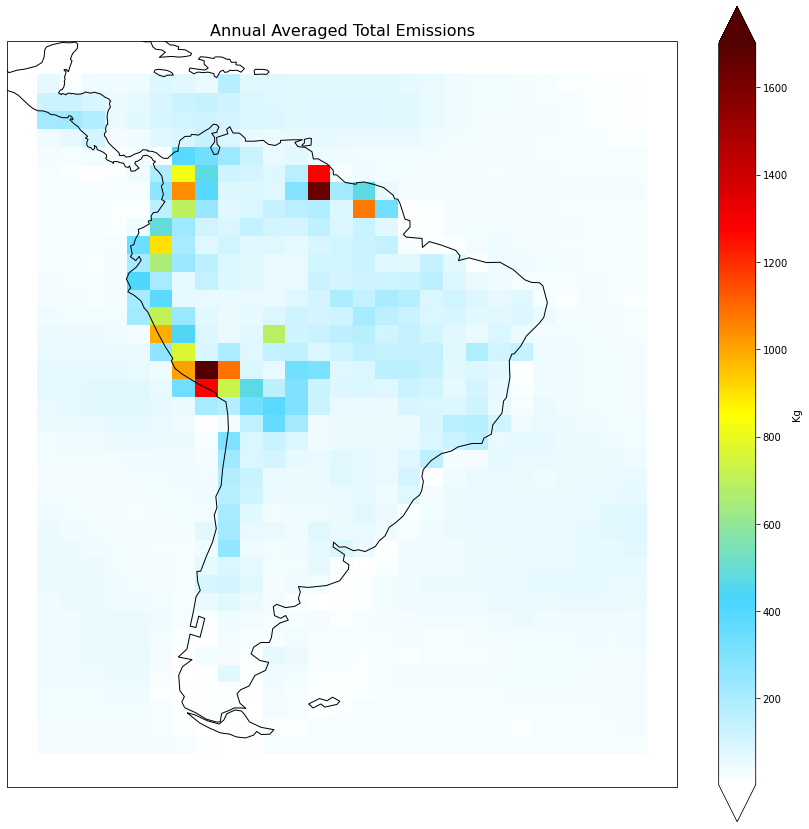

In [86]:
fig = plt.figure(figsize=[15,15])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

Total.groupby('time.year').mean('time').plot(ax=ax, #set the axis
                        #levels = np.arange(-500, 1500, .01), #set the levels for our colorbars
                       extend='both',#extend the colorbar in both directions
                       transform=ccrs.PlateCarree(), #fit data into map
                       cbar_kwargs={'label':'Kg'}, #label our colorbar (use ds_a just to get units)
                        cmap=WhGrYlRd)  #choose color for our colorbar

ax.coastlines() #add coastlines
plt.title('Annual Averaged Total Emissions', fontsize = 16); #title
#av=df_d.resample('AS').mean()
#print('Global Average Value from Model: ',av['IJ-AVG-S_Hg0'][0])

In [42]:
# We use the "subplot_kw" argument to apply cartopy on each sub-panel
# Full documentation available at https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html
fig, axes = plt.subplots(1, 2, figsize=[10, 4], subplot_kw={'projection': ccrs.PlateCarree()})

# We use the "cbar_kwargs" argument to tweak colorbar.
# Full documentation available at http://xarray.pydata.org/en/stable/generated/xarray.plot.pcolormesh.html
dr_surf.plot(ax=axes[0], cmap=WhGrYlRd, vmin=0, cbar_kwargs={'shrink': 0.5, 'label': 'mol/mol'})
axes[0].set_title('surface Ozone')

# Also plot 500 hPa Ozone (the 23rd layer)
ds['TRC_O3'].isel(time=0, lev=22).plot(ax=axes[1], cmap=WhGrYlRd, vmin=0, cbar_kwargs={'shrink': 0.5, 'label': 'mol/mol'})
axes[1].set_title('500 hPa Ozone')

# Use for loop to save some coding. Useful when there are a lot of subplots.
for ax in axes:
    ax.coastlines()
    ax.gridlines(linestyle='--')
    

/home/tzd/Hg_dataset_practice


In [89]:
len(emissions)

10

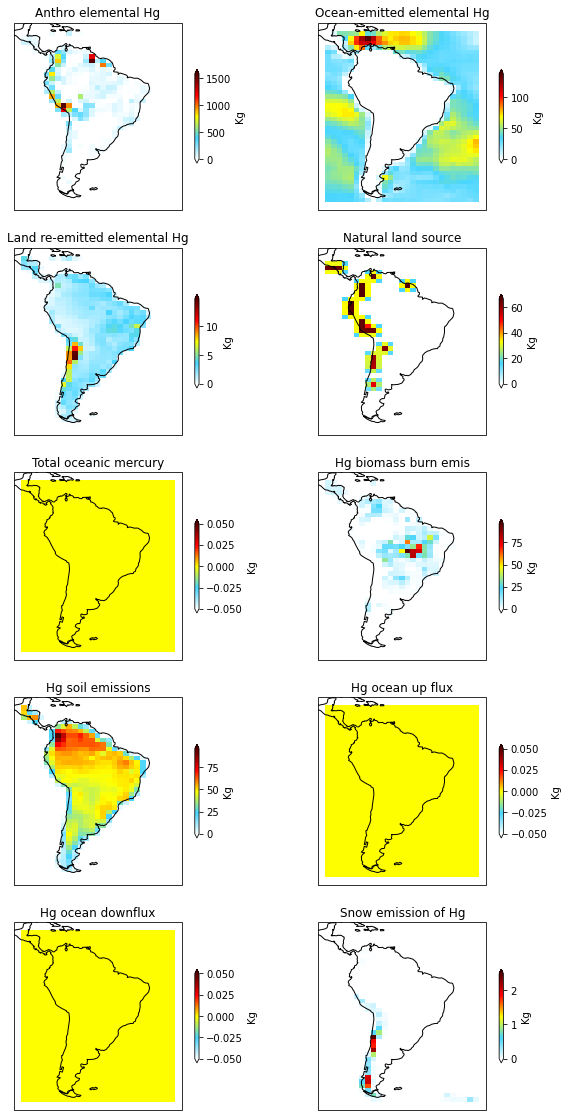

In [99]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 20),subplot_kw={'projection': ccrs.PlateCarree()})
norm = mpl.colors.Normalize(vmin=0, vmax=5)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=WhGrYlRd).cmap
i=0
for ax in axes.flat:
    #ax.set_axis_off()
    im = drSA[emissions[i]].groupby('time.year').mean('time').plot(ax=ax, #set the axis
                        #levels = np.arange(-500, 1500, .01), #set the levels for our colorbars
                       extend='both',#extend the colorbar in both directions
                       transform=ccrs.PlateCarree(), #fit data into map
                       vmin=0, cbar_kwargs={'shrink': 0.5, 'label': 'Kg'},
                        #cbar_kwargs={'label':'Kg'}, #label our colorbar (use ds_a just to get units)
                        cmap=cmap)  #choose color for our colorbar

    ax.coastlines() #add coastlines
    ax.set_title(Cat_m[emissions[i]][0])
    i=i+1
    #plt.title('Annual Averaged Total Emissions', fontsize = 16); #title
    

# notice that here we use ax param of figure.colorbar method instead of

# the cax param as the above example

#cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.95)

#cbar.set_ticks(np.arange(0, 1.1, 0.5))
#cbar.set_ticklabels(['low', 'medium', 'high'])

plt.show()

In [106]:
emissionsP=['HG-SRCE__Hg0_an','HG-SRCE__Hg0_oc','HG-SRCE__Hg0_ln','HG-SRCE__Hg0_na','HG-SRCE__Hg_bb','HG-SRCE__Hg_so','HG-SRCE__Hg0_snow','Tot_emit']
Cat_m['Tot_emit']=['Annual Averaged Total Emissions','Kg']

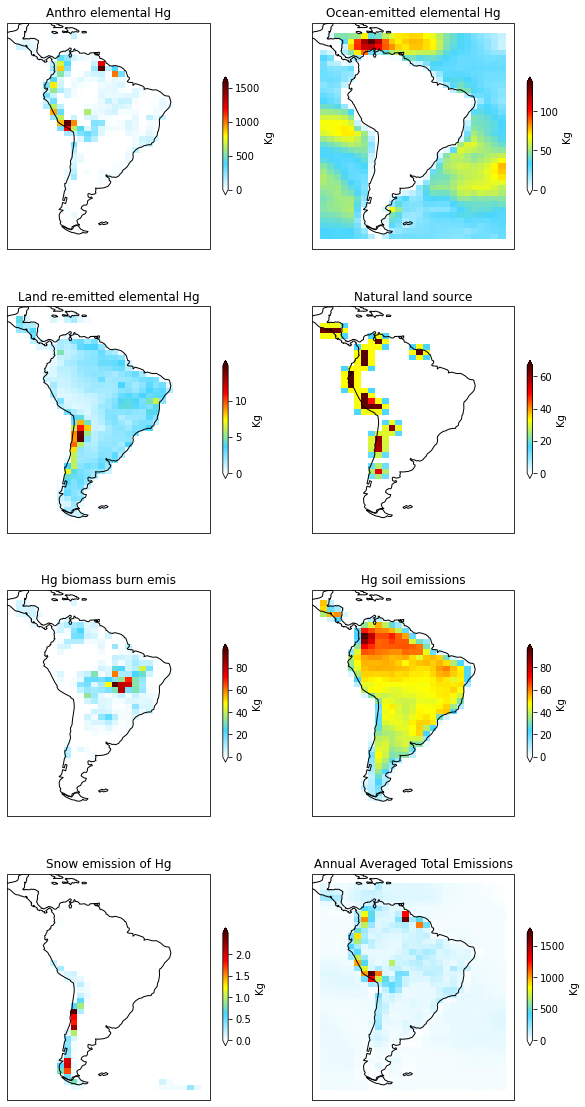

In [107]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 20),subplot_kw={'projection': ccrs.PlateCarree()})
norm = mpl.colors.Normalize(vmin=0, vmax=5)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=WhGrYlRd).cmap
i=0
for ax in axes.flat:
    #ax.set_axis_off()
    im = drSA[emissionsP[i]].groupby('time.year').mean('time').plot(ax=ax, #set the axis
                        #levels = np.arange(-500, 1500, .01), #set the levels for our colorbars
                       extend='both',#extend the colorbar in both directions
                       transform=ccrs.PlateCarree(), #fit data into map
                       vmin=0, cbar_kwargs={'shrink': 0.5, 'label': 'Kg'},
                        #cbar_kwargs={'label':'Kg'}, #label our colorbar (use ds_a just to get units)
                        cmap=cmap)  #choose color for our colorbar

    ax.coastlines() #add coastlines
    ax.set_title(Cat_m[emissionsP[i]][0])
    i=i+1
    #plt.title('Annual Averaged Total Emissions', fontsize = 16); #title
    

# notice that here we use ax param of figure.colorbar method instead of

# the cax param as the above example

#cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.95)

#cbar.set_ticks(np.arange(0, 1.1, 0.5))
#cbar.set_ticklabels(['low', 'medium', 'high'])

plt.show()

In [31]:
dx_ESA=dx_Emit.loc[dict(longitude=slice(-92.0,-25.0),latitude=slice(-58.0,18.0))]
dx_ESA

ValueError: dimensions or multi-index levels ['longitude', 'latitude'] do not exist

In [55]:
for i in range(12):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11


In [ ]:
antro

In [ ]:
dr=df_Esurf['HG-SRCE__Hgdep_sn'].to_xarray()
dr

In [ ]:
#coordinates got messed up so fix it

drop=dr_tot.drop('Lon-000')
new=dr_tot.drop('Lat-000')
dr_tot_fixed=new.assign_coords({'Lon-000':np.arange(-180., 180., 2.5), 'Lat-000':np.arange(-90., 90., 1.98)})
dr_tot_fixed

In [ ]:
dr_tot_fixed.mean(dim='time').plot()

In [ ]:
fig = plt.figure(figsize=[16,8])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

dr_tot_fixed.mean(dim='time').plot(ax=ax, #set the axis
                        #levels = np.arange(0, 5, .01), #set the levels for our colorbars
                       extend='both',#extend the colorbar in both directions
                       transform=ccrs.PlateCarree(), #fit data into map
                       #cbar_kwargs={'label':ds_a['IJ-AVG-S_Hg0'].attrs['unit']}, #label our colorbar (use ds_a just to get units)
                        cmap='hsv')  #choose color for our colorbar

ax.coastlines() #add coastlines
plt.title('Monthly Averaged Hg0', fontsize = 16); #title
#av=df_d.resample('AS').mean()
#print('Global Average Value from Model: ',av['IJ-AVG-S_Hg0'][0])

In [ ]:

dr_year=dr_fixed.groupby('time.year').mean('time').to_dataframe()

dr_year


In [ ]:
dr_yearX=dr_fixed.groupby('time.year').mean('time')
dr_yearX

In [ ]:
dr_yearX=dr_yearX.rename({'Lon-000': 'longitude','Lat-000': 'latitude'})
dr_yearX

In [ ]:
LAPA=dr_yearX.loc[dict(longitude=slice(-92.0,-25.0),latitude=slice(-58,18))]
#da.loc[dict(time=slice("2000-01-01", "2000-01-02"))]

In [ ]:
dr_yearX=dr_yearX.rename({'Lon-000': 'longitude','Lat-000': 'latitude'})
dr_yearX
LAPA=dr_yearX.loc[dict(longitude=slice(-92.0,-25.0),latitude=slice(-58,18))]
#da.loc[dict(time=slice("2000-01-01", "2000-01-02"))]

In [ ]:

fig = plt.figure(figsize=[15,15])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

LAPA.plot(ax=ax, #set the axis
                        levels = np.arange(0, 5, .01), #set the levels for our colorbars
                       extend='both',#extend the colorbar in both directions
                       transform=ccrs.PlateCarree(), #fit data into map
                       cbar_kwargs={'label':ds_a['IJ-AVG-S_Hg0'].attrs['unit']}, #label our colorbar (use ds_a just to get units)
                        cmap='hsv')  #choose color for our colorbar

ax.coastlines() #add coastlines
#-92ax.set_extent([-150, -20, -90, 90])
plt.title('Annual Averaged Hg0', fontsize = 16); #title
#av=df_d.resample('AS').mean()
#print('Global Average Value from Model: ',av['IJ-AVG-S_Hg0'][0])

In [ ]:
import geoplot.crs as gcrs
import regionmask 
import geopandas as gpd
import geoplot as gplt
Lapan= pd.read_csv('Lapan.csv')
# Creating GeoPandas GeoDataFrame using the Pandas Dataframe 
Lapan_gdf = gpd.GeoDataFrame(Lapan, geometry = gpd.points_from_xy(Lapan['Longitude'],Lapan['Latitude'] ))



In [ ]:
Lapan_gdf=Lapan_gdf.sort_values('Latitude')
Lapan_gdf

In [ ]:
LAP=pd.DataFrame()
LAP['LONG']=Lapan_gdf['Longitude']
LAP['LATI']=Lapan_gdf['Latitude']
LAP['OBS']=Lapan_gdf['Measured Conc (ng/m3)']
LAP =LAP.reset_index(drop=True)


In [ ]:
LAP =LAP.reset_index(drop=True)
LAP['OBS'].iloc[20]=0.88
#The observations are currently recorded as strings. They need to be changed to floating point numbers
observe=[]
for item in LAP['OBS']:
    observe.append(float(item))
observe    
LAP['OBS']=observe

In [ ]:
LAP

In [ ]:
LAP['OBS']

In [ ]:
#LAPAN =LAP.to_xarray()
#LAPAN['OBS'].plot(x="LONG", y="LATI", col_wrap=3)
#t.plot(x="lon", y="lat", col="time", col_wrap=3)


In [ ]:
#LAPAN

In [ ]:
 df_Latin = gpd.GeoDataFrame(LAP , geometry = gpd.points_from_xy(LAP['LONG'],LAP['LATI'] ))

In [ ]:
df_Latin
L_OB_GEO =df_Latin.drop(columns=['LATI','LONG']) 
L_OB_GEO

In [ ]:
import matplotlib as mpl
fig = plt.figure(figsize=[15,15], frameon=True)
ax = plt.axes(projection=ccrs.PlateCarree(), frameon=True)
norm = mpl.colors.Normalize(vmin=0, vmax=5)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='hsv').cmap

LAPA.plot(ax=ax, #set the axis
                        #levels = np.arange(0, 5, .01), #set the levels for our colorbars
                       extend='both',#extend the colorbar in both directions
                       transform=ccrs.PlateCarree(), #fit data into map
                       cbar_kwargs={'label':ds_a['IJ-AVG-S_Hg0'].attrs['unit']}, #label our colorbar (use ds_a just to get units)
                        cmap=cmap,norm=norm)  #choose color for our colorbar
#L_OB_GEO.plot(ax=ax,marker='o',levels = np.arange(0, 5, .01),cmap='hsv', markersize=20,)
gplt.pointplot(L_OB_GEO,hue='OBS', cmap=cmap,norm=norm,ax=ax,edgecolor='black', linewidth=0.5
)
for x, y, label in zip(L_OB_GEO.geometry.x, L_OB_GEO.geometry.y, L_OB_GEO.OBS):
        ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
        
ax.coastlines() #add coastlines

#ax.outline_patch.set_edgecolor('black')
#ax.gridlines(linestyle='--')
ax.set_extent([-90, -25, -55, 16])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.3, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xlines = True
gl.ylines = True
plt.title('Annual Averaged $Hg^0$ Observations on GEOS Chem Output background', fontsize = 16); #title
#av=df_d.resample('AS').mean()
#print('Global Average Value from Model: ',av['IJ-AVG-S_Hg0'][0])

In [ ]:
LAPA

In [ ]:
#longitude=slice(-92.0,-25.0),latitude=slice(-58,18))]

fig = plt.figure(figsize=[15,15])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

LAPA.plot(ax=ax, #set the axis
                        levels = np.arange(0, 5, .01), #set the levels for our colorbars
                       extend='both',#extend the colorbar in both directions
                       transform=ccrs.PlateCarree(), #fit data into map
                       cbar_kwargs={'label':ds_a['IJ-AVG-S_Hg0'].attrs['unit']}, #label our colorbar (use ds_a just to get units)
                        cmap='hsv')  #choose color for our colorbar
gplt.pointplot(L_OB_GEO,hue='OBS', cmap=cmap,norm=norm,ax=ax,edgecolor='black', linewidth=0.5
)
for x, y, label in zip(L_OB_GEO.geometry.x, L_OB_GEO.geometry.y, L_OB_GEO.OBS):
        ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")


ax.set_extent([-90, -25, -55, 16])
ax.coastlines() #add coastlines
#-92ax.set_extent([-150, -20, -90, 90])
plt.title('Annual Averaged Hg0', fontsize = 16); #title
#av=df_d.resample('AS').mean()
#print('Global Average Value from Model: ',av['IJ-AVG-S_Hg0'][0])

In [ ]:
import matplotlib as mpl
fig = plt.figure(figsize=[15,15])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
norm = mpl.colors.Normalize(vmin=0, vmax=7)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='hsv').cmap

#LAPA.plot(ax=ax, #set the axis
                        #levels = np.arange(0, 5, .01), #set the levels for our colorbars
                       #extend='both',#extend the colorbar in both directions
                       #transform=ccrs.PlateCarree(), #fit data into map
                       #cbar_kwargs={'label':ds_a['IJ-AVG-S_Hg0'].attrs['unit']}, #label our colorbar (use ds_a just to get units)
                       # cmap=cmap,norm=norm)  #choose color for our colorbar
#L_OB_GEO.plot(ax=ax,marker='o',levels = np.arange(0, 5, .01),cmap='hsv', markersize=20,)
gplt.pointplot(L_OB_GEO,hue='OBS', cmap=cmap,norm=norm,ax=ax,linewidth=0.5,
               label='$Hg^0_{obs}$',legend=False)
for x, y, label in zip(L_OB_GEO.geometry.x, L_OB_GEO.geometry.y, L_OB_GEO.OBS):
        ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
        
ax.coastlines() #add coastlines

ax.set_extent([-90, -25, -55, 16])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.3, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xlines = True
gl.ylines = True
plt.title('Annual Averaged $Hg^0$ Observations', fontsize = 16); #title
#av=df_d.resample('AS').mean()
#print('Global Average Value from Model: ',av['IJ-AVG-S_Hg0'][0])

In [ ]:
da = xr.DataArray([1, 2, 3], [("x", [0, 1, 2])])

da.sel(x=[1.1, 1.9], method="nearest")

In [ ]:
LAP_GC=LAPA.sel(latitude=LAP['LATI'][1], longitude=LAP['LONG'][1],method="nearest")

In [ ]:
My_list=[LAP_GC]
My_list[0].to_dataframe().reset_index(drop=True)['IJ-AVG-S_Hg0'][0]

In [ ]:
GC_list=[]
for index,item in enumerate(LAP['OBS']):
    LAP_GC=LAPA.sel(latitude=LAP['LATI'][index], longitude=LAP['LONG'][index],method="nearest")
    val=LAP_GC.to_dataframe().reset_index(drop=True)['IJ-AVG-S_Hg0'][0]
    GC_list.append(val)
    print(item,':',val)

In [ ]:
df_comp=LAP
df_comp['GChem']=GC_list
df_comp

In [ ]:
from math import *
import numpy as np
from scipy import stats

x = df_comp['OBS'].drop(index=26)
y=df_comp['GChem'].drop(index=26)
slope, intercept, r_value, p_value, std_err= stats.linregress(x, y)
m = slope.astype(float)
#Create a basic scatter plot with Matplotlib
#A identity line was created based on the minumum and maximum observed value
#Points markers are colored by the residual and a residual colorbar is added to the figure
#df_compare['Residual'] = df_compare['GChem']- df_compare['Hg0_M_C(ng/m3)']
fig = plt.figure(figsize=(10,8))
z = np.linspace(0,3.0, 100)
plt.plot(z, z, linestyle='dashed',label="1:1 line")
plt.scatter(x,y, marker='o',color="purple",label="Data")
plt.plot(x, m*x + intercept, 'grey', label='regression fitted line')

#cbar = plt.colorbar()
#cbar.set_label('Residual (ng/m3)', fontsize=14)

plt.grid()
plt.legend()
plt.xlabel('Observed Concentration (ng/m3)', fontsize=14)
plt.ylabel(' Simulated Concentration (ng/m3)', fontsize=14)
fig.tight_layout()
#fig.savefig('../Figures/ObservedSimulatedHeadComparisonPlot.png')
print("slope:", slope,
      "\nintercept:", intercept,
      "\nr squared:", r_value**2,
      "\np-value:", p_value,
      "\nst_error", std_err,
      "\nRMSE", sqrt(std_err))

In [ ]:
#Create a basic scatter plot with Matplotlib
#A identity line was created based on the minumum and maximum observed value
#Points markers are colored by the residual and a residual colorbar is added to the figure
df_new=df_comp.drop(index=26)
x = df_comp['OBS'].drop(index=26)
y=df_comp['GChem'].drop(index=26)
df_new['Residual'] = x-y
fig = plt.figure(figsize=(10,8))
w= np.linspace(0,3, 100)
plt.plot(w, w, linestyle='dashed')
plt.scatter(x,y, marker='o', c=df_new['Residual'])

cbar = plt.colorbar()
cbar.set_label('Difference (ng/m3)', fontsize=14)

plt.grid()
plt.xlabel('Observed Concentration (ng/m3)', fontsize=14)
plt.ylabel('Simulated Concentration (ng/m3)', fontsize=14)
fig.tight_layout()
#fig.savefig('../Figures/ObservedSimulatedHeadComparisonPlot.png')

In [ ]:
#grap the latitude values from the data set to use for the x axes
Latitude =[]
for item in df_comp['LATI'].drop(index=26):
    Latitude.append(round(item, 2))


In [ ]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))
    
labels = Latitude
Hg0obs = df_comp['OBS'].drop(index=26)
Hg0_GC = df_comp['GChem'].drop(index=26)

x = Latitude  # the label locations


fig, ax = plt.subplots(figsize=[18,10])
rects1 = ax.plot(x,Hg0obs,'o', label='$Hg^0_{obs}$')
rects2 = ax.plot(x,Hg0_GC,'*', label='$Hg^*_{GChem}$')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('$Hg^0 (ngm^{-3})$')
ax.set_title('Comparison between observed $Hg^0$ annual averages and GEOS Chem $Hg^0$ annual averages in South America ')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=90, fontsize=10,ha='right')
#plt.xticks(x, labels, rotation='vertical')
#ax.legend()
ax.set_xlabel('Latitude')
legend_without_duplicate_labels(ax)

plt.show()

In [ ]:
df_Asurf['IJ-AVG-S_Hg0']

In [ ]:
LAP.set_index(['LATI', 'LONG'], inplace=True)
observe=[]
for item in LAP['OBS']:
    observe.append(float(item))
observe    
LAP['OBS']=observe
#.to_xarray()

<font size="5"> Begin making colorplots here using data loaded above

In [ ]:
copy=df_Asurf.copy()
df_dif=copy.drop(columns=['IJ-AVG-S_Hg0', 'IJ-AVG-S_HgP', 'IJ-AVG-S_Hg2', 'BXHGHT-S_BXHEIGHT', 'BXHGHT-S_T', 'BXHGHT-S_PMID'])
difference=[]
date=[]
subtract=df_Bsurf['IJ-AVG-S_Hg0']-df_Asurf['IJ-AVG-S_Hg0']
subtract=subtract.to_frame()
for row in subtract.itertuples():
    difference.append(row._1)
    date.append(row.Index[3])
df_dif['IJ-AVG-S_Hg0']=difference
df_dif

In [ ]:
dsHg=df_dif.to_xarray() #change to xarray dataset so you can graph it using prev method
#coordinates got messed up so fix it
dsHg

In [ ]:
dsHg=df_dif.to_xarray() #change to xarray dataset so you can graph it using prev method
#coordinates got messed up so fix it
drop=dsHg.drop('Lon-000')
new=dsHg.drop('Lat-000')
fixed_latlon=new.assign_coords({'Lon-000':np.arange(-180., 180., 2.5), 'Lat-000':np.arange(-90., 90., 1.98)})

fixed_latlon

In [ ]:
fig = plt.figure(figsize=[16,8])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

fixed_latlon['IJ-AVG-S_Hg0'].mean(dim='time').plot(ax=ax, #set the axis
                        levels = np.arange(0, .5, .01), #set the levels for our colorbars
                       extend='both',#extend the colorbar in both directions
                       transform=ccrs.PlateCarree(), #fit data into map
                       cbar_kwargs={'label':ds_a['IJ-AVG-S_Hg0'].attrs['unit']}, #label our colorbar (use ds_a just to get units)
                        cmap='hsv')  #choose color for our colorbar

ax.coastlines() #add coastlines
plt.title('Monthly Averaged Hg0 Difference (Artisinal Mining - No Artisinal Mining)', fontsize = 16); #title
av=df_d.resample('AS').mean()
print('Global Average Value from Model: ',av['IJ-AVG-S_Hg0'][0])

In [ ]:
############## Plot time mean of Hg0 difference between Artisinal Mining and No AM ##########
fig = plt.figure(figsize=[16,8])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

fixed_latlon['IJ-AVG-S_Hg0'].mean(dim='time').plot(ax=ax, #set the axis
                        levels = np.arange(0, .5, .01), #set the levels for our colorbars
                       extend='both',#extend the colorbar in both directions
                       transform=ccrs.PlateCarree(), #fit data into map
                       cbar_kwargs={'label':ds_a['IJ-AVG-S_Hg0'].attrs['unit']}, #label our colorbar (use ds_a just to get units)
                        cmap='hsv')  #choose color for our colorbar

ax.coastlines() #add coastlines
plt.title('Monthly Averaged Hg0 Difference (Artisinal Mining - No Artisinal Mining)', fontsize = 16); #title
av=df_d.resample('AS').mean()
print('Global Average Value from Model: ',av['IJ-AVG-S_Hg0'][0])

In [ ]:
######create empty frame with coordinates already ready######
#######add percent data by creating a temporary percent dataframe, which for some reason ends up with incorrect coordinates#######

copy=df_Asurf.copy()
df_percent=copy.drop(columns=['IJ-AVG-S_Hg0', 'IJ-AVG-S_HgP', 'IJ-AVG-S_Hg2', 'BXHGHT-S_BXHEIGHT', 'BXHGHT-S_T', 'BXHGHT-S_PMID'])
percent=[]
date=[]
temp_percent=(df_Bsurf['IJ-AVG-S_Hg0']-df_Asurf['IJ-AVG-S_Hg0'])/df_Bsurf['IJ-AVG-S_Hg0']*100
temp_percent=temp_percent.to_frame()
for row in temp_percent.itertuples():
    percent.append(row._1)
    date.append(row.Index[3])
df_percent['IJ-AVG-S_Hg0']=percent
df_percent

In [ ]:
dsHgchange=df_percent.to_xarray() #change to xarray dataset so you can graph it using prev method

#coordinates got messed up so fix it
drop=dsHgchange.drop('Lon-000')
new=drop.drop('Lat-000')
fixed_dims=dsHgchange.assign_coords({'Lon-000':np.arange(-180., 180., 2.5), 'Lat-000':np.arange(-90., 90., 1.98)})

fixed_dims

In [ ]:
############## Plot time mean of Hg0 difference between Artisinal Mining and No AM ##########
fig = plt.figure(figsize=[14,7])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

fixed_dims['IJ-AVG-S_Hg0'].mean(dim='time').plot(ax=ax, #set the axis
                        levels = np.arange(3, 20, .1), #set the levels for our colorbars
                       extend='both',#extend the colorbar in both directions
                       transform=ccrs.PlateCarree(), #fit data into map
                       cbar_kwargs={'label':'% change'}, #label our colorbar (use ds_a just to get units)
                        cmap='hsv')  #choose color for our colorbar

ax.coastlines() #add coastlines
plt.title('Monthly Averaged Hg0 Percent Change \n((Artisinal Mining - No Artisinal Mining)/(Artisinal Mining)*100)', fontsize = 16); #title
av=df_p.resample('AS').mean()
print('Global Average Value from Model: ',av['IJ-AVG-S_Hg0'][0])

<font size="3">  1) The largest differences between Artisinal Mining and No Artisinal Mining models occur near the equator. This is shown by a significantly higher percent change and difference around 0 degrees latitude. The highest percent change show that there is about a 20% decrease in Hg0 concentrations from the base case when no artisanal mining is occuring. Percent change decreases at the more extreme latitudes (both positive and negative).The lowest percent change is in the ocean above Antarctica. The lowest percent change shows about a 3% decrease in Hg0 concentrations from the base case when no artisinal mining is occurring.
    
<font size="3">According to the scatter plot, the difference between the artisanal mining and base case increases from January and reaches a peak in August; afterwards, the differences follow a downward trend.
    
<font size="3">2) If I wanted to see the effects of artisanal mining only being able to measure Hg0, I would take measurements in the northern region of South America; however, to know how much of this Hg0 is due to artisanal mining, I would want to take measurements in the red region(regions affected little by ASGM) as well and compare. Preferrably, the red region for comparison would be at a similar latitude. Measurements should be taken for a year (or multiple full years) to account for the seasonal changes in Hg0 concentration, and I am not sure at what frequency to take the measurement (weekly, preferrably daily?).


<font size="5">  Trying to plot data from 2 months at a time to see if there are significant concentration differences in the model at some locations (preferrably in US and CA where we already have data)

In [ ]:
datasets=['/net/fs03/d1/angot/postdoc/GMA_2018/my_runs/production_runs_2x2.5/BASE/netcdf_output/trac.20151101.000000.nc', 
         '/net/fs03/d1/angot/postdoc/GMA_2018/my_runs/production_runs_2x2.5/BASE/netcdf_output/trac.20151201.000000.nc']
asgmdatasets=['//net/fs03/d1/angot/postdoc/GMA_2018/my_runs/production_runs_2x2.5/ASGM/netcdf_output/trac.20151101.000000.nc',
             '//net/fs03/d1/angot/postdoc/GMA_2018/my_runs/production_runs_2x2.5/ASGM/netcdf_output/trac.20151201.000000.nc']
ds_base2=xr.open_mfdataset(datasets, preprocess=fix_ds, concat_dim=['time'], combine='by_coords')
ds_asgm2=xr.open_mfdataset(asgmdatasets, preprocess=fix_ds, concat_dim=['time'], combine='by_coords')
# ds2=xr.open_dataset('/net/fs03/d1/angot/postdoc/GMA_2018/my_runs/production_runs_2x2.5/BASE/netcdf_output/trac.20150201.000000.nc')
ds_base2
ds_asgm2

In [ ]:
#create shortened dataset wiht only necessary info
ds_bshort=xr.Dataset()
ds_bshort['IJ-AVG-S_Hg0']=(ds_base2['IJ-AVG-S__Hg0'])
ds_bshort['BXHGHT-S_BXHEIGHT']=(ds_base2['BXHGHT-S__BXHEIGHT'])
ds_bshort['BXHGHT-S_T']=(ds_base2['BXHGHT-S__T']) #Kelvins
ds_bshort['BXHGHT-S_PMID']=(ds_base2['BXHGHT-S__PMID'])*100 #hpa to pa
ds_bshort['BXHGHT-S_PMID'].attrs['unit']='Pa'

df_b = ds_bshort.to_dataframe()
df_bsurf=df_b[:26208]

# #######changing units to ng/m3 from ppt using P/(TR)*pptv*MW #########

'''P/(TR)*ppt*MW --> Pa/(K*J/(mol*K))*ppt*g/mol --> g/m3*ppt. to get rid of ppt, multiply by 1e-12.'''
species=['IJ-AVG-S_Hg0']
df_bsurf['IJ-AVG-S_Hg0']= df_bsurf['IJ-AVG-S_Hg0']*ppt* stdpressure/(stdtemp*R)*MW*1e9 #1e9 converts from g to ng

#now units are ng/m3
ds_bshort['IJ-AVG-S_Hg0'].attrs['unit']='ng/m3'
df_bsurf

In [ ]:
#create shortened dataset wiht only necessary info
ds_ashort=xr.Dataset()
ds_ashort['IJ-AVG-S_Hg0']=(ds_asgm2['IJ-AVG-S__Hg0'])
ds_ashort['BXHGHT-S_BXHEIGHT']=(ds_asgm2['BXHGHT-S__BXHEIGHT'])
ds_ashort['BXHGHT-S_T']=(ds_asgm2['BXHGHT-S__T']) #Kelvins
ds_ashort['BXHGHT-S_PMID']=(ds_asgm2['BXHGHT-S__PMID'])*100 #hpa to pa
ds_ashort['BXHGHT-S_PMID'].attrs['unit']='Pa'

df_a = ds_ashort.to_dataframe()
df_asurf=df_a[:26208]

# #######changing units to ng/m3 from ppt using P/(TR)*pptv*MW #########

'''P/(TR)*ppt*MW --> Pa/(K*J/(mol*K))*ppt*g/mol --> g/m3*ppt. to get rid of ppt, multiply by 1e-12.'''
species=['IJ-AVG-S_Hg0']
df_asurf['IJ-AVG-S_Hg0']= df_asurf['IJ-AVG-S_Hg0']*ppt* stdpressure/(stdtemp*R)*MW*1e9 #1e9 converts from g to ng

#now units are ng/m3
ds_ashort['IJ-AVG-S_Hg0'].attrs['unit']='ng/m3'
df_asurf

In [ ]:
#####Creating a dataset where the IJ-AVG-S_Hg0 column is the difference between base and asgm######
copy=df_asurf.copy()
df_dif=copy.drop(columns=['IJ-AVG-S_Hg0', 'BXHGHT-S_BXHEIGHT', 'BXHGHT-S_T', 'BXHGHT-S_PMID'])
difference=[]
date=[]
subtract=df_bsurf['IJ-AVG-S_Hg0']-df_asurf['IJ-AVG-S_Hg0']
subtract=subtract.to_frame()
for row in subtract.itertuples():
    difference.append(row._1)
    date.append(row.Index[3])
df_dif['IJ-AVG-S_Hg0']=difference
df_dif

In [ ]:
two_months=df_dif.to_xarray() #change to xarray dataset so you can graph it using prev method

#coordinates got messed up so fix it
drop=two_months.drop('Lon-000')
new=drop.drop('Lat-000')
fixed_dims=new.assign_coords({'Lon-000':np.arange(-180., 180., 2.5), 'Lat-000':np.arange(-90., 90., 1.98)})

fixed_dims

In [ ]:
months=[]
for ind in df_dif.index:
    day=ind[3].to_pydatetime()
    stringdate=day.strftime('%m/%Y')
    months.append(stringdate)
month2=months[:2]

In [ ]:
############## Plot time mean of Hg0 2 months ##########
fig = plt.figure(figsize=[14,7])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

fixed_dims['IJ-AVG-S_Hg0'].mean(dim='time').plot(ax=ax, #set the axis
                        levels = np.arange(-.5, 2, .1), #set the levels for our colorbars
                       extend='both',#extend the colorbar in both directions
                       transform=ccrs.PlateCarree(), #fit data into map
                       cbar_kwargs={'label':'ng/m3'}, #label our colorbar (use ds_a just to get units)
                        cmap='hsv')  #choose color for our colorbar

ax.coastlines() #add coastlines
plt.title('Hg0 Difference (Artisinal Mining - No Artisinal Mining)\n Averaged between ' + str(month2), fontsize = 16); #title
# av=df_p.resample('AS').mean()
# print('Global Average Value from Model: ',av['IJ-AVG-S_Hg0'][0])

<font size='5'> LOG:
 
    20150101-20150201 = minimal difference detected in US/Canada
    20150201-20150301 = minimal difference detected in US/Canada
    20150301-20150401 = minimal difference detected in US/Canada
    20150401-20150501 = minimal difference detected in US/Canada
    20150501-20150601 = slight difference detected in US/Canada (near Fl/TX)
    20150601-20150701 = slight difference detected in US/Canada (near Fl/TX) (most change)
    20150701-20150801 = slight difference detected in US/Canada (near Fl/TX) (no change)
    20150801-20150901 = less in South and Fl now, difference in TX still detected
    20150901-20151001 = less in South, none in Fl, still TX
    20151001-20151101 = minimal difference detected in US/Canada
    20151101-20151201 = minimal difference detected in US/Canada

<font size='5'> Find data in TX, FL or other Southern states in 6-7 of 2015
    
    